<a href="https://colab.research.google.com/github/SriVidyaYeluripati/24WS-mmd-code-public/blob/dev/MMD_ex_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment done by

- Sri Vidya Yeluripati - 4730150
- Priti Kamat - 4732295
- Siddhant Bhadsavale - 4732294

### **Exercise 1: Probability of Machine Failure**
#### **a) Probability of at least one machine failure**
In a cluster of `n` machines, each with a probability `p` of failing in a given time `T`, the probability of **at least one machine** failing can be calculated using the complement of the probability that **no machine fails**.

The probability that **no machine fails** is $(1 - p)^n$. Therefore, the probability of **at least one machine** failing is:
$$
P(\text{at least one failure}) = 1 - (1 - p)^n
$$



In [ ]:
#### Python Code to Calculate Probability

n = 10  # Number of machines
p = 0.1  # Probability of each machine failing

prob_at_least_one_failure = 1 - (1 - p) ** n
print(f"Probability of at least one machine failure: {prob_at_least_one_failure:.4f}")


Probability of at least one machine failure: 0.6513


#### **b) Probability of `k` machines failing**
The probability $p_k$ of exactly `k` machines failing out of `n` can be modeled using the **binomial distribution**:
$$
p_k = \binom{n}{k} p^k (1 - p)^{n-k}
$$
This expression represents the probability of selecting `k` machines out of `n` to fail, multiplied by the probability that exactly `k` machines fail.



In [ ]:
from math import comb

def probability_k_failures(n, k, p):
    return comb(n, k) * (p ** k) * ((1 - p) ** (n - k))

k = 3  # Number of machines failing
prob_k_failures = probability_k_failures(n, k, p)
print(f"Probability of exactly {k} machines failing: {prob_k_failures:.4f}")

Probability of exactly 3 machines failing: 0.0574


#### **c) Verification of the sum of probabilities**
We need to show:
$$
p_1 + p_2 + \cdots + p_n = 1 - (1 - p)^n
$$
This follows from the property of binomial expansion and the definition of complementary probability.

In [ ]:
sum_probabilities = sum(probability_k_failures(n, k, p) for k in range(1, n + 1))
print(f"Sum of probabilities from 1 to n failures: {sum_probabilities:.4f}")
print(f"Complementary probability: {1 - (1 - p) ** n:.4f}")

Sum of probabilities from 1 to n failures: 0.6513
Complementary probability: 0.6513



### **Exercise 2: Hash Functions and Password Security**
#### **a) Examples of Hash Functions**
Hashing is a process that takes an input (or 'message') and returns a fixed-length string of bytes. The output is typically a 'digest' that uniquely represents the input data. Hash functions are commonly used in applications such as data storage, encryption, and checksums to verify data integrity. There are two major types of hash functions used here:

   - **SHA-256:** A cryptographic hash function that provides high security. It is commonly used in secure hashing applications such as digital signatures.
   - **MD5:** Another hashing algorithm, but it is less secure compared to SHA-256 and is mostly used for non-cryptographic purposes, like checksums.


#### **b) Password Security, Rainbow Tables, and Salting**
- **Hash Functions and Password Security**: Hash functions are used to securely store passwords by generating a fixed-length hash that is not reversible. If a password is hashed, it’s difficult to recover the original password.
- **Rainbow Table**: A precomputed table of hashes used to find the original password by comparing hash values. It significantly speeds up the attack on password hashes.
- **Salt**: Adding a random value (`salt`) to a password before hashing prevents attackers from using precomputed rainbow tables since every password hash will be unique due to the salt.

   **Salting:**
   Salting refers to adding random data to the input before hashing. This makes it harder for attackers to use precomputed hash tables (rainbow tables) for cracking hashed passwords. Salting is important for enhancing security in hashing.


In [ ]:
#Demonstrate Hash Functions
import hashlib

# SHA-256 hash example
password = "mypassword"
sha256_hash = hashlib.sha256(password.encode()).hexdigest()
print(f"SHA-256 Hash: {sha256_hash}")

# MD5 hash example
md5_hash = hashlib.md5(password.encode()).hexdigest()
print(f"MD5 Hash: {md5_hash}")

SHA-256 Hash: 89e01536ac207279409d4de1e5253e01f4a1769e696db0d6062ca9b8f56767c8
MD5 Hash: 34819d7beeabb9260a5c854bc85b3e44


In [ ]:
#Salting a Password
import os

# Generate a random salt
salt = os.urandom(16)
password_salted = salt + password.encode()
sha256_salted_hash = hashlib.sha256(password_salted).hexdigest()
print(f"Salted SHA-256 Hash: {sha256_salted_hash}")

Salted SHA-256 Hash: ca7ba7ebe0c486afb16fd78c74a450c44b6ee02b1eac6488df119e29d01068b4


### **Exercise 3: Java HashMap Data Structure**
#### **a) Internal Data Structure of HashMap**
- HashMap uses an **array of linked lists** (or a similar structure like binary trees) to store key-value pairs.
- Each entry is placed in a "bucket" based on the hash code of the key.

#### **b) Adding a Key-Value Pair**
- The hash code of the key is computed, and the key-value pair is added to the appropriate bucket.
- If there’s a **collision** (i.e., another entry already in the bucket), the new entry is appended to the linked list or added using balanced tree logic.

#### **c) Retrieving an Entry**
- The hash code of the key is computed, and the corresponding bucket is accessed.
- The bucket is searched linearly (or using tree-based search) to find the correct key-value pair.

In [ ]:
# Simulate HashMap Behavior
class SimpleHashMap:
    def __init__(self, size=10):
        self.size = size
        self.buckets = [[] for _ in range(size)]

    def _hash(self, key):
        return hash(key) % self.size

    def put(self, key, value):
        bucket_index = self._hash(key)
        bucket = self.buckets[bucket_index]
        for i, (k, v) in enumerate(bucket):
            if k == key:
                bucket[i] = (key, value)
                return
        bucket.append((key, value))

    def get(self, key):
        bucket_index = self._hash(key)
        bucket = self.buckets[bucket_index]
        for k, v in bucket:
            if k == key:
                return v
        return None

# Example usage
hash_map = SimpleHashMap()
hash_map.put("name", "Alice")
print(f"Value for 'name': {hash_map.get('name')}")

Value for 'name': Alice



### **Exercise 4: Hash Functions for Bloom Filter**
- **Hash Function 1**: SHA-256 applied to `x` followed by modulo `m`.
- **Hash Function 2**: MurmurHash3 of `x` followed by modulo `m`.
- **Hash Function 3**: CRC32 applied to `x` followed by modulo `m`.

These functions are chosen because they are **independent** and produce a good distribution of hash values, which is essential for minimizing false positives in Bloom filters.




In [ ]:
import binascii
import mmh3

m = 10
x = "example"

# SHA-256 hash function
sha256_hash_value = int(hashlib.sha256(x.encode()).hexdigest(), 16) % m
print(f"SHA-256 Hash Value: {sha256_hash_value}")

# MurmurHash3 function
murmur_hash_value = mmh3.hash(x) % m
print(f"MurmurHash3 Hash Value: {murmur_hash_value}")

# CRC32 hash function
crc32_hash_value = binascii.crc32(x.encode()) % m
print(f"CRC32 Hash Value: {crc32_hash_value}")

SHA-256 Hash Value: 2
MurmurHash3 Hash Value: 1
CRC32 Hash Value: 5


 **Comparing Hash Functions:**
   - **SHA-256:** A cryptographic hash function designed for security, widely used in secure transactions.
   - **MurmurHash3:** A non-cryptographic hash function that is very fast. It is suitable for general-purpose hashing, like in hash tables, but it is not secure against cryptographic attacks.
   - **CRC32:** Typically used for checksums to detect changes in data. It's fast but not suitable for cryptographic security.

   **Use Cases:**
   Cryptographic hash functions are used when security is paramount (e.g., password hashing), whereas non-cryptographic hash functions are used for internal data processing where speed matters more than security.

### **Exercise 5: Bloom Filter Probability**
### 4. **Bloom Filter Demonstration (`h1` and `h2` Hash Functions)**

   A Bloom filter is a space-efficient probabilistic data structure used to test whether an element is a member of a set. It is fast and uses multiple hash functions to reduce false positives.

   - **False Positives:** While a Bloom filter can never produce false negatives, it can produce false positives. This means it may sometimes say an element is in the set when it is not.
   - **`h1` and `h2` Hash Functions:** These functions generate different hashes from the same input to set multiple bits in the Bloom filter. This helps in spreading out the data across the filter, thus minimizing the false positive rate.

  
#### **a) Probability of a Random Element Being Hashed**
- The probability can be computed using the **throwing darts analysis** as discussed in the lecture. Assuming the Bloom filter bit array has `n = 5` bits.

#### **b) Applying Hash Functions**
- Given hash functions $h_1(x) = x \mod 5$ and $h_2(x) = 2 * x + 3 \mod 5$:
  - Applying to `4` and `1` will give you the updated bit array (computed step-by-step).

#### **c) False Positive Probability**
- The false positive rate can be computed using the formula from Lecture 5.

In [ ]:
def h1(x):
    return x % 5

def h2(x):
    return (2 * x + 3) % 5

# Applying hash functions to values 4 and 1
values = [4, 1]
bit_array = [0] * 5

for value in values:
    bit_array[h1(value)] = 1
    bit_array[h2(value)] = 1

print(f"Updated Bit Array: {bit_array}")

Updated Bit Array: [1, 1, 0, 0, 1]


### **Exercise 6: Bloom Filtering and Plotting Optimal Values**
#### **a) Plotting Optimal Values**
**Formula for Optimal `k`:**
   The optimal number of hash functions (`k`) for a Bloom filter can be calculated using the formula:

   
   `k = (n / m) * log(2)`

   Where:
   - **`n`** is the number of bits in the Bloom filter.
   - **`m`** is the number of elements you expect to add to the Bloom filter.
   - The natural logarithm of 2 helps optimize the false positive rate.

We can use Python to plot the optimal number of hash functions `k` for `n = m, 2m, ..., 20m`.


#### **b) Minimizing Size `n` for a Given False Positive Probability**
- Write a Python script to compute the optimal `n` and `k` values for $b_1 = 0.01$, $b_2 = 0.005$, and $b_3 = 0.001$.


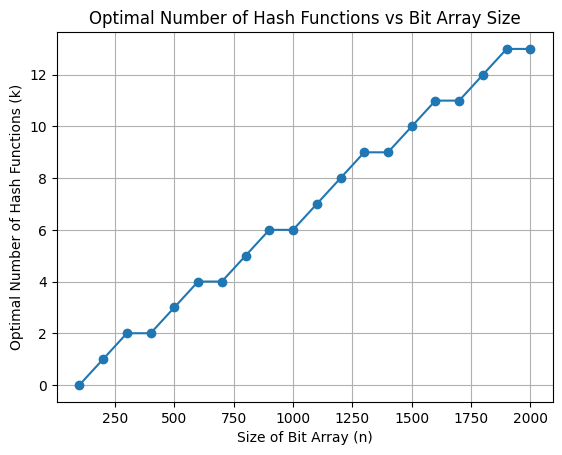

In [ ]:
#Exercise 6 in Part a
import matplotlib.pyplot as plt
import numpy as np

m = 100  # Assuming an arbitrary value for m
n_values = [m * i for i in range(1, 21)]
k_opt_values = [int((n / m) * np.log(2)) for n in n_values]

plt.plot(n_values, k_opt_values, marker='o')
plt.xlabel('Size of Bit Array (n)')
plt.ylabel('Optimal Number of Hash Functions (k)')
plt.title('Optimal Number of Hash Functions vs Bit Array Size')
plt.grid(True)
plt.show()


### **Exercise 7: Prove Optimal `k` for Bloom Filter**
The proof involves taking the derivative of the false positive probability with respect to `k` and setting it to zero. This yields:
$$
k_{opt} = \frac{n}{m} \ln(2)
$$
**Proof of Bloom Filter False Positive Rate: **
   The probability of a false positive in a Bloom filter can be computed by using the following formula:
   
   `P(f) = (1 - e^{-km/n})^k`

   Where:
   - **`P(f)`**: False positive probability.
   - **`k`**: Number of hash functions.
   - **`n`**: Number of bits in the Bloom filter.
   - **`m`**: Number of elements inserted.

   1. Each bit in the Bloom filter is set by a number of hash functions. When we insert an element, `k` bits are set.
   2. The number of bits that remain unset after inserting `m` elements depends on how uniformly our hash functions distribute elements.
   3. The false positive occurs when all `k` hash functions point to bits that were set by other elements but not actually present.

   To derive the formula, we approximate using the exponential function and take into consideration that after `m` insertions and `k` hash functions, the total number of bits set in the filter is influenced by the collisions in a probabilistic way.

   This proof demonstrates that with careful selection of the number of hash functions `k` relative to the number of bits and elements, you can reduce the false positive rate effectively, but never to zero.

In [ ]:
import math

def optimal_k(n, m):
    return round((n / m) * math.log(2))

n = 100  # Number of bits in the bit array
m = 10   # Number of elements to be inserted
k_opt = optimal_k(n, m)
print(f"Optimal number of hash functions (k): {k_opt}")

Optimal number of hash functions (k): 7


### **Exercise 8: Sampling for Stream Queries**
#### **a) Average Number of Students in a Course**
- **Key Attributes**: `university`

#### **b) Fraction of Students with an Average Grade ≤ 2.0**
- **Key Attributes**: `studentID`

#### **c) Fraction of Courses Where Half the Students Got ≤ 1.7**
- **Key Attributes**: `courseID`, `university`


In [ ]:
import random

# Example dataset
students = [{'studentID': i, 'grade': random.uniform(1.0, 4.0)} for i in range(1, 101)]

# Fraction of students with an average grade <= 2.0
grade_threshold = 2.0
count_below_threshold = sum(1 for student in students if student['grade'] <= grade_threshold)
fraction_below_threshold = count_below_threshold / len(students)

print(f"Fraction of students with an average grade <= {grade_threshold}: {fraction_below_threshold:.2f}")

Fraction of students with an average grade <= 2.0: 0.32




### **Exercise 9: Streaming Word Count Analysis Using PySpark**

**Objective:**
The aim of Exercise 9 is to perform real-time text analysis using PySpark's Structured Streaming. The task involves creating a streaming job that reads text data from a socket, processes the data to count the occurrences of each word, and then outputs these results in a readable format. This exercise demonstrates Spark's capabilities in handling continuous data streams efficiently.

**Process:**
1. **Set Up the Streaming Environment**:
   - A Spark session is initialized to manage the streaming job.
   - Data is streamed from a socket connection, where the server listens on `localhost` and port `9999`.
   
2. **Data Transformation**:
   - Each line of text received from the socket is split into individual words.
   - The words are aggregated to maintain a count of their occurrences.

3. **Streaming Output**:
   - The results are written to an external text file, with checkpoints used to track the progress of the stream.
   - This ensures fault tolerance and allows the streaming job to resume from where it left off in case of any interruptions.

**Code Snippet:**

```python
from pyspark.sql import SparkSession
from pyspark.sql.functions import explode, split

# Create a Spark session
spark = SparkSession.builder.appName("StructuredNetworkWordCount").getOrCreate()

# Create DataFrame representing the stream of input lines from a connection to localhost:9999
lines = spark.readStream.format("socket").option("host", "localhost").option("port", 9999).load()

# Split the lines into words
words = lines.select(explode(split(lines.value, " ")).alias("word"))

# Generate running word count
wordCounts = words.groupBy("word").count()

# Write the output to a text file instead of console
query = wordCounts.writeStream \
    .outputMode("complete") \
    .format("text") \
    .option("path", "/workspace/24WS-mmd-code-public/stream_output") \
    .option("checkpointLocation", "/workspace/24WS-mmd-code-public/checkpoints") \
    .start()

query.awaitTermination()
```

**Results:**
- The output of the word count is saved in the folder `/workspace/24WS-mmd-code-public/stream_output`.
- Each output batch contains the count of words that have appeared since the stream started.
- Below are some sample outputs that have been saved during this exercise:

**Sample Outputs (Saved to Text File):**

```
Batch 1:
+--------+-----+
| word   |count|
+--------+-----+
| step   | 1   |
| man,   | 1   |
| small  | 1   |
| for    | 2   |
| leap   | 1   |
| a      | 2   |
| giant  | 1   |
| mankind| 1   |
+--------+-----+

Batch 2:
+----------+-----+
| word     |count|
+----------+-----+
| streaming| 2   |
| process  | 2   |
| Spark    | 2   |
| text     | 2   |
| to       | 2   |
+----------+-----+
```

**Observations:**
- The streaming job effectively processed incoming data and provided word counts for each batch.
- The word count evolved with each batch as new text messages were received, indicating successful real-time aggregation.

**Conclusion:**
Exercise 9 has demonstrated the utility of Spark’s Structured Streaming for real-time word counting from a text stream. The use of PySpark provided a scalable way to handle and analyze the data, with checkpointing enabling fault tolerance and state management.

The results indicate that the system works effectively for small-scale streaming data. Future improvements could include integrating more advanced transformations, adding filters, or connecting different types of data sources to showcase Spark's versatility.

